In [10]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from collections import Counter
#nltk.download('all')

# load data
file = open('T1.txt', encoding='utf-8')
text = file.read()
file.close()

# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
remove_these = set( list(string.punctuation) + list(string.digits))
filtered_text = [w for w in tokens if not w in remove_these]
# remove remaining tokens that are not alphabetic
filtered_text = [word for word in filtered_text if word.isalpha()]

In [13]:
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
noun1 = [word for (word, pos) in nltk.pos_tag(filtered_text) if is_noun(pos)] 
noun1

['cryptography',
 'network',
 'security',
 'principles',
 'practices',
 'edition',
 'cryptography',
 'network',
 'security',
 'principles',
 'practices',
 'edition',
 'stallings',
 'publisher',
 'prentice',
 'hall',
 'pub',
 'date',
 'print',
 'print',
 'table',
 'contents',
 'index',
 'pages',
 'age',
 'viruses',
 'hackers',
 'eavesdropping',
 'fraud',
 'security',
 'disciplines',
 'cryptography',
 'network',
 'security',
 'applications',
 'network',
 'security',
 'text',
 'survey',
 'principles',
 'practice',
 'cryptography',
 'network',
 'security',
 'issues',
 'network',
 'security',
 'capability',
 'survey',
 'cryptography',
 'network',
 'security',
 'technology',
 'practice',
 'network',
 'security',
 'applications',
 'use',
 'today',
 'table',
 'contents',
 'cryptography',
 'network',
 'security',
 'principles',
 'practices',
 'edition',
 'stallings',
 'publisher',
 'prentice',
 'hall',
 'pub',
 'date',
 'print',
 'print',
 'table',
 'contents',
 'index',
 'pages',
 'notation',


In [14]:
print("Number of nouns in book "+ str(len(noun1)))

Number of nouns in book 20991


In [15]:
is_verb = lambda pos: pos[:1] == 'V'

verb1 = [word for (word, pos) in nltk.pos_tag(filtered_text) if is_verb(pos)]
print("Number of verbs in book are "+ str(len(verb1)))

Number of verbs in book are 9204


In [16]:
#gives the categories of nouns or verb that the word belongs to
from nltk.corpus import wordnet as wn
def synset(words):
  categories=[]
  for word in words:
    cat=[]
    for synset in wn.synsets(word):
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        cat.append(synset.lexname())
      if('verb' in synset.lexname()):
        cat.append(synset.lexname())
    categories.append(cat)
  return categories

In [17]:
noun_syn1=synset(noun1)
verb_syn1=synset(verb1)

In [18]:
#GIVES TOTAL NOUN LEXNAMES AND TOTAL VERB LEXNAMES FOR FREQUENCY DISTRIBUTIONS
def all_synsets(no,ve):
  nouns=[]
  verbs=[]
  for word in no:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
  for word in ve:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
      
  return nouns,verbs

In [19]:
noun_superset1,verb_superset1=all_synsets(noun1,verb1)

In [20]:
print(noun_superset1)

['noun.cognition', 'noun.act', 'noun.group', 'noun.artifact', 'noun.artifact', 'noun.artifact', 'noun.artifact', 'noun.state', 'noun.possession', 'noun.feeling', 'noun.possession', 'noun.possession', 'noun.group', 'noun.communication', 'noun.artifact', 'noun.act', 'noun.cognition', 'noun.cognition', 'noun.cognition', 'noun.cognition', 'noun.communication', 'noun.cognition', 'noun.act', 'noun.act', 'noun.act', 'noun.act', 'noun.cognition', 'noun.communication', 'noun.group', 'noun.communication', 'noun.cognition', 'noun.cognition', 'noun.act', 'noun.group', 'noun.artifact', 'noun.artifact', 'noun.artifact', 'noun.artifact', 'noun.state', 'noun.possession', 'noun.feeling', 'noun.possession', 'noun.possession', 'noun.group', 'noun.communication', 'noun.artifact', 'noun.act', 'noun.cognition', 'noun.cognition', 'noun.cognition', 'noun.cognition', 'noun.communication', 'noun.cognition', 'noun.act', 'noun.act', 'noun.act', 'noun.act', 'noun.cognition', 'noun.communication', 'noun.group', 'no

In [21]:
len(noun_superset1)

124783

<BarContainer object of 25 artists>

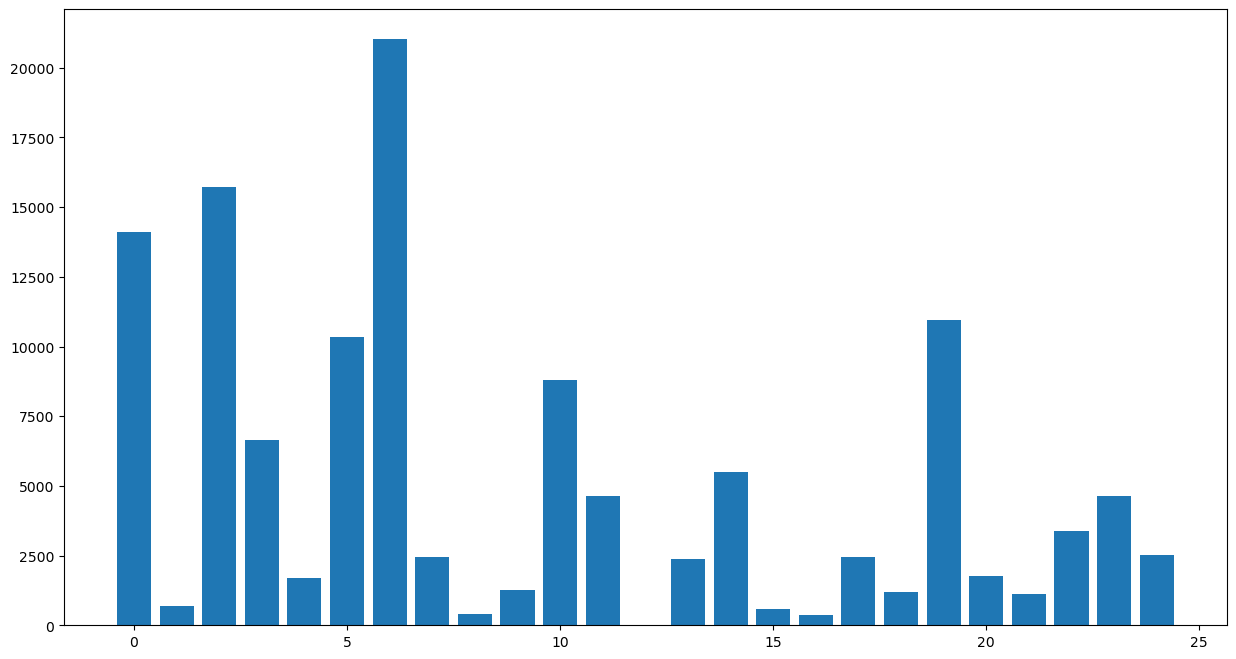

In [24]:
import numpy as np
labels, counts = np.unique(noun_superset1,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')

In [23]:
print(labels)

['noun.act' 'noun.animal' 'noun.artifact' 'noun.attribute' 'noun.body'
 'noun.cognition' 'noun.communication' 'noun.event' 'noun.feeling'
 'noun.food' 'noun.group' 'noun.location' 'noun.motive' 'noun.object'
 'noun.person' 'noun.phenomenon' 'noun.plant' 'noun.possession'
 'noun.process' 'noun.quantity' 'noun.relation' 'noun.shape' 'noun.state'
 'noun.substance' 'noun.time']


<BarContainer object of 15 artists>

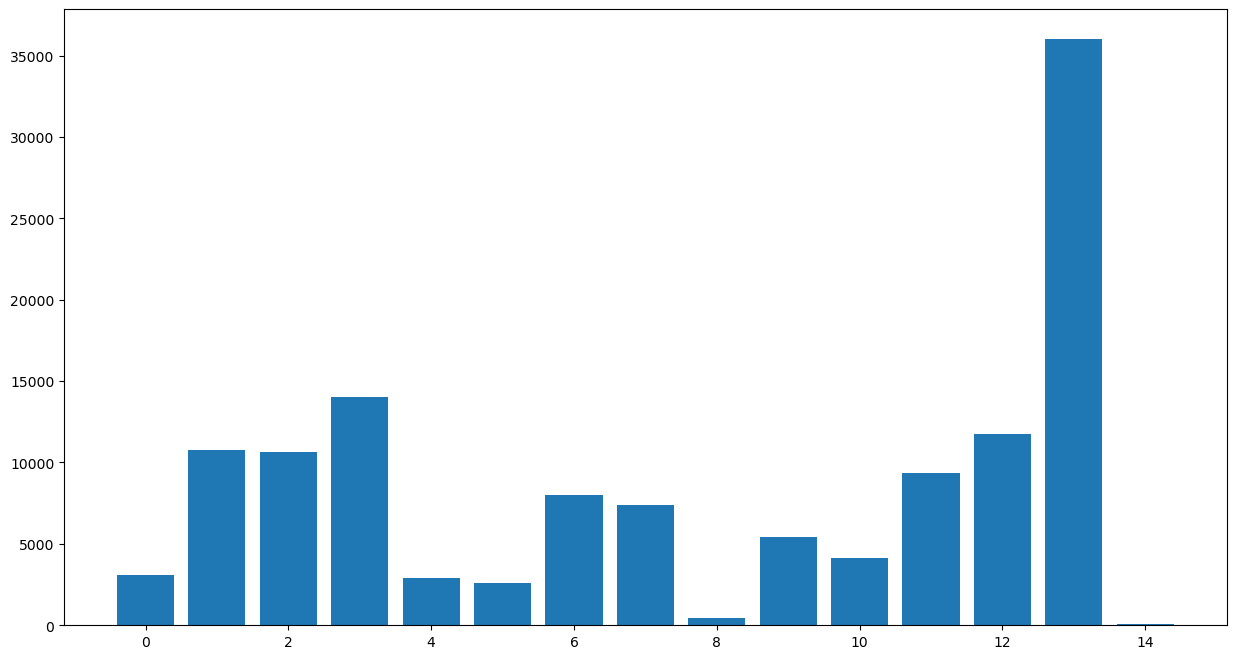

In [25]:
labels, counts = np.unique(verb_superset1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')

In [28]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
spacy.load('en_core_web_sm')
nlp = en_core_web_sm.load()
T1_text=' '.join(filtered_text)
doc1 = nlp(T1_text)
print("there are total "+str(len(doc1.ents))+" entities in book")

there are total 1142 entities in book


In [29]:
T1_text

'cryptography and network security principles and practices fourth edition cryptography and network security principles and practices fourth edition by william stallings publisher prentice hall pub date november print print etext table of contents etext index pages in this age of viruses and hackers of electronic eavesdropping and electronic fraud security is paramount as the disciplines of cryptography and network security have matured more practical readily available applications to enforce network security have developed this text provides a practical survey of both the principles and practice of cryptography and network security first the basic issues to be addressed by a network security capability are explored through a tutorial and survey of cryptography and network security technology then the practice of network security is explored via practical applications that have been implemented and are in use today file table of contents cryptography and network security principles and

In [30]:
print([(X, X.ent_iob_) for X in doc1])

[(cryptography, 'O'), (and, 'O'), (network, 'O'), (security, 'O'), (principles, 'O'), (and, 'O'), (practices, 'O'), (fourth, 'B'), (edition, 'O'), (cryptography, 'O'), (and, 'O'), (network, 'O'), (security, 'O'), (principles, 'O'), (and, 'O'), (practices, 'O'), (fourth, 'B'), (edition, 'O'), (by, 'O'), (william, 'B'), (stallings, 'I'), (publisher, 'O'), (prentice, 'B'), (hall, 'I'), (pub, 'I'), (date, 'O'), (november, 'O'), (print, 'O'), (print, 'O'), (etext, 'O'), (table, 'O'), (of, 'O'), (contents, 'O'), (etext, 'O'), (index, 'O'), (pages, 'O'), (in, 'O'), (this, 'O'), (age, 'O'), (of, 'O'), (viruses, 'O'), (and, 'O'), (hackers, 'O'), (of, 'O'), (electronic, 'O'), (eavesdropping, 'O'), (and, 'O'), (electronic, 'O'), (fraud, 'O'), (security, 'O'), (is, 'O'), (paramount, 'O'), (as, 'O'), (the, 'O'), (disciplines, 'O'), (of, 'O'), (cryptography, 'O'), (and, 'O'), (network, 'O'), (security, 'O'), (have, 'O'), (matured, 'O'), (more, 'O'), (practical, 'O'), (readily, 'O'), (available, 'O')

In [31]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location

In [32]:
person1,org1,location1=entity_recognition(T1_text)
print("number of person entities in book  are "+str(len(person1)))
print("number of organization entities in book are "+str(len(org1)))
print("number of location entities in book are "+str(len(location1)))

number of person entities in book  are 160
number of organization entities in book are 151
number of location entities in book are 32


In [33]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts

In [34]:
X = freq(org1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('zicvtwqngkzeiigasxstslvvwla', 1), ('zealand', 1), ('z', 1), ('y', 1), ('xiv', 1), ('xcsma', 1), ('x', 1), ('wesleyan', 1), ('watermarking', 1), ('washington', 1), ('w', 1), ('von', 1), ('v', 1), ('upper', 1), ('university', 1), ('u', 1), ('transformation', 1), ('toga', 1), ('thus', 1), ('therefore', 1), ('then', 1), ('the', 1), ('terada', 1), ('technology', 1), ('substitution', 1), ('subnib', 1), ('state', 1), ('standards', 1), ('standard', 1), ('sqgkc', 1), ('sqapu', 1), ('signal', 1), ('set', 1), ('senate', 1), ('section', 1), ('schulzrinne', 1), ('santa', 1), ('saddle', 1), ('rsa', 1), ('routo', 1), ('river', 1), ('representatives', 1), ('reinhold', 1), ('rei', 1), ('purdue', 1), ('pub', 1), ('proceeds', 1), ('prentice', 1), ('pqtyj', 1), ('playfair', 1), ('pearson', 1), ('party', 1), ('pairs', 1), ('p', 1), ('oregon', 1), ('one', 1), ('officer', 1), ('of', 1), ('nyberg', 1), ('nsa', 1), ('nist', 1), ('nibbles', 1), ('new', 1), ('navy', 1), ('national', 1), ('n', 1), ('muir', 1),

In [35]:
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('y', 1), ('xv', 1), ('xor', 1), ('xiv', 1), ('x', 1), ('wimsey', 1), ('william', 1), ('waterloo', 1), ('wang', 1), ('walter', 1), ('w', 1), ('von', 1), ('vernam', 1), ('van', 1), ('v', 1), ('university', 1), ('u', 1), ('tzu', 1), ('tuchman', 1), ('trentacoste', 1), ('tracy', 1), ('tom', 1), ('sun', 1), ('stiglic', 1), ('stallings', 1), ('smith', 1), ('singh', 1), ('simon', 1), ('shamir', 1), ('scribner', 1), ('schaefer', 1), ('sarah', 1), ('sanjay', 1), ('s', 1), ('rotnib', 1), ('roger', 1), ('robin', 1), ('richard', 1), ('re', 1), ('rcon', 1), ('rao', 1), ('qzjka', 1), ('quinn', 1), ('pu', 1), ('prentice', 1), ('philip', 1), ('ph', 1), ('peter', 1), ('paul', 1), ('patricia', 1), ('parker', 1), ('page', 1), ('outerbridge', 1), ('nichols', 1), ('nicholas', 1), ('nakahara', 1), ('n', 1), ('muir', 1), ('moseley', 1), ('modulo', 1), ('mod', 1), ('meyer', 1), ('mcgibney', 1), ('mcdowell', 1), ('max', 1), ('mauborgne', 1), ('mason', 1), ('marketing', 1), ('marcia', 1), ('mac', 1), ('ma', 1

In [36]:
X = freq(location1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('york', 1), ('washington', 1), ('vernam', 1), ('united', 1), ('toronto', 1), ('tokyo', 1), ('the', 1), ('stein', 1), ('states', 1), ('page', 1), ('north', 1), ('new', 1), ('moscow', 1), ('malaysia', 1), ('london', 1), ('laguna', 1), ('kx', 1), ('kong', 1), ('jersey', 1), ('japan', 1), ('iii', 1), ('hong', 1), ('hills', 1), ('germany', 1), ('galois', 1), ('egypt', 1), ('cetin', 1), ('canada', 1), ('belgium', 1), ('australia', 1), ('asia', 1), ('america', 1)]
